In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_excel(r'../../Data/CompInfo/上市信息财务信息-利润表.xlsx')

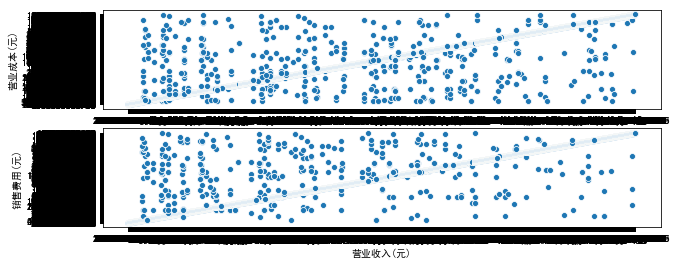

In [4]:
# fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(10, 4))
# sns.scatterplot(x=df['营业收入(元)'], y=df['营业成本(元)'], ax=ax1)
# sns.scatterplot(x=df['营业收入(元)'], y=df['销售费用(元)'], ax=ax2)

In [116]:
df_profit = df.copy()
df_profit.head(n=5)

,企业编号,标题,日期,营业收入(元),营业成本(元),销售费用(元),财务费用(元),管理费用(元),资产减值损失(元),投资收益(元),营业利润(元),利润总额(元),所得税(元),归属母公司所有者净利润(元)
0,1001,利润表,2018-09-30,127109000000,NaN,NaN,NaN,30421000000,44072000000,11116000000,50918000000,50893000000,7229000000,43034000000
1,1001,利润表,2018-06-30,82256000000,NaN,NaN,NaN,19971000000,26929000000,9382000000,34164000000,34161000000,5261000000,28432000000
2,1001,利润表,2018-03-31,39629000000,NaN,NaN,NaN,9680000000,12173000000,3696000000,17105000000,17106000000,2647000000,14266000000
3,1001,利润表,2017-12-31,168619000000,NaN,NaN,NaN,41047000000,55285000000,13585000000,70275000000,69828000000,14826000000,54046000000
4,1001,利润表,2017-09-30,125471000000,NaN,NaN,NaN,29275000000,40145000000,8391000000,54621000000,54743000000,12347000000,41305000000


In [115]:
# foo = pd.DataFrame({'a': [1, 2, 3, 4], 'b': [2000, '200亿', '300万', 90000]})
# foo
# chinese = set(foo['b'].str.extract("([0-9]+)", expand=False).dropna())
# chinese
# foo.loc[(foo['b'].str.contains("万") == True), 'b'] = foo.loc[(
#     foo['b'].str.contains("万") == True), 'b'].str.replace('万', '').astype(float)*1000
# foo.loc[(foo['b'].str.contains("亿") == True)]['b'].str.replace('亿', '').astype(float)*1000000000

In [117]:
# 检查所有属性里面包含中文单位的情况，"([^0-9\.\-]+)"是指排除0-9十个数字及‘.’和‘-’这两个符号
for arr in ['营业收入(元)', '营业成本(元)', '销售费用(元)', '财务费用(元)', '管理费用(元)', '资产减值损失(元)', '投资收益(元)', '营业利润(元)', '利润总额(元)', '所得税(元)', '归属母公司所有者净利润(元)']:
    chinese = set(df_profit[arr].str.extract(
        "([^0-9\.\-]+)", expand=False).dropna())
    print(arr, chinese)

营业收入(元) {'万', '亿'}
营业成本(元) {'万', '亿'}
销售费用(元) {'万', '亿'}
财务费用(元) {'万', '亿'}
管理费用(元) {'万', '亿'}
资产减值损失(元) {'亿', '万'}
投资收益(元) {'亿', '万'}
营业利润(元) {'万', '亿'}
利润总额(元) {'万', '亿'}
所得税(元) {'亿', '万'}
归属母公司所有者净利润(元) {'万', '亿'}


In [118]:
# 替换“亿”，“万”
for arr in ['营业收入(元)', '营业成本(元)', '销售费用(元)', '财务费用(元)', '管理费用(元)', '资产减值损失(元)', '投资收益(元)', '营业利润(元)', '利润总额(元)', '所得税(元)', '归属母公司所有者净利润(元)']:
    df_profit.loc[(df_profit[arr].str.contains("万") == True), arr] = df_profit.loc[(
        df_profit[arr].str.contains("万") == True), arr].str.replace('万', '').astype(float)*10000
    df_profit.loc[(df_profit[arr].str.contains("亿") == True), arr] = df_profit.loc[(
        df_profit[arr].str.contains("亿") == True), arr].str.replace('亿', '').astype(float)*100000000

In [119]:
# check again
for arr in ['营业收入(元)', '营业成本(元)', '销售费用(元)', '财务费用(元)', '管理费用(元)', '资产减值损失(元)', '投资收益(元)', '营业利润(元)', '利润总额(元)', '所得税(元)', '归属母公司所有者净利润(元)']:
    chinese = set(df_profit[arr].str.extract(
        "([^0-9\.\-]+)", expand=False).dropna())
    print(arr, chinese)

营业收入(元) set()
营业成本(元) set()
销售费用(元) set()
财务费用(元) set()
管理费用(元) set()
资产减值损失(元) set()
投资收益(元) set()
营业利润(元) set()
利润总额(元) set()
所得税(元) set()
归属母公司所有者净利润(元) set()


In [114]:
# 导出
# df_profit.to_excel('./上市信息财务信息-利润表(清楚单位).xlsx', index=False)